#### Locally weighted regression
- Data import
- Data preprocessing
- Data visulization
- Model
- Accuracy

In [1]:
### Data import
import pandas as pd

data_X_Uncleaned = pd.read_csv('weightedX.csv').values
data_Y_Uncleaned = pd.read_csv('weightedY.csv').values

print("The size of data is for input {}".format(data_X_Uncleaned.shape))
print("The size of data is for output {}".format(data_Y_Uncleaned.shape))

The size of data is for input (99, 1)
The size of data is for output (99, 1)


In [9]:
### Data preprocessing

#statistical data analysis
print("Before cleaning")
print("The mean of the data is {}".format(data_X_Uncleaned.mean()))
print("The std of the data is {}\n\n\n".format(data_X_Uncleaned.std()))

train_x = (data_X_Uncleaned - data_X_Uncleaned.mean())/data_X_Uncleaned.std()
train_y = data_Y_Uncleaned

print("After cleaning")
print("The mean of the data is {}".format(round(train_x.mean(),2)))
print("The std of the data is {}".format(train_x.std()))

Before cleaning
The mean of the data is 4.041444171717172
The std of the data is 4.779836076603112



After cleaning
The mean of the data is -0.0
The std of the data is 1.0


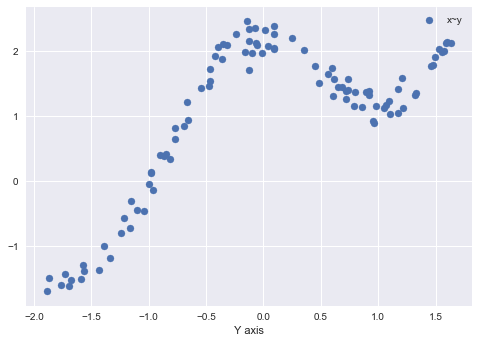

In [16]:
### Data visulization

import matplotlib.pyplot as plt

plt.style.use("seaborn")
plt.scatter(train_x,train_y,label="x~y")
plt.xlabel("X axis")
plt.xlabel("Y axis")
plt.legend()
plt.show()

In [13]:
### Verfiy normalization using the sklearn

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler() 
data_scaled = scaler.fit_transform(data_X_Uncleaned)

print(data_scaled.mean(axis=0))
print(data_scaled.std(axis=0))

[-1.34572488e-16]
[1.]


In [45]:
### Model Preparation
"""Functions by Deepanshu garg"""

import numpy as np
def getW(query_point,X,tau):
    """Function returns the weight value"""
    M = X.shape[0]
    W = np.mat(np.eye(M))
    
    for i in range(M):
        xi = X[i]
        x  = query_point
        W[i,i] =  np.exp(np.dot((xi-x),(xi-x).T)/(-2*tau*tau))
    return W

def predict(X,Y,query_x,tau):
    """Function return the prediction"""
    ones = np.ones((X.shape[0],1))
    X_ = np.hstack((X,ones))
    
    qx = np.mat([query_x,1])
    
    W = getW(qx,X_,tau)
    
    #theta = `(X′WX)inv * X′WY`
    theta = np.linalg.pinv(X_.T*(W*X_))*(X_.T*(W*Y))
    #print(theta.shape)
    pred = np.dot(qx,theta)
    return theta,pred

def plotPrediction(tau):
    X_test = np.linspace(-2,2,20)
    Y_test = []
    
    for xq in X_test:
        theta,pred = predict(train_x,train_y,xq,tau)
        Y_test.append(pred[0][0])
        
    Y_test = np.array(Y_test)
    
    XO = np.array(train_x)
    YO = np.array(train_y)
    
    plt.title("Tau/Bandwidth Param %.2f"%tau)
    plt.scatter(XO,YO)
    plt.scatter(X_test,Y_test,color="red")
    plt.show()

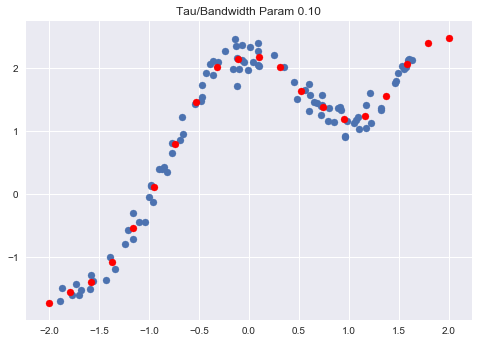

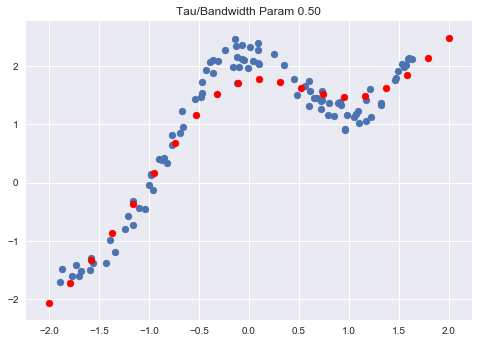

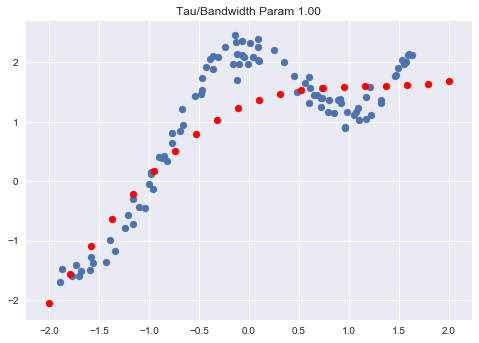

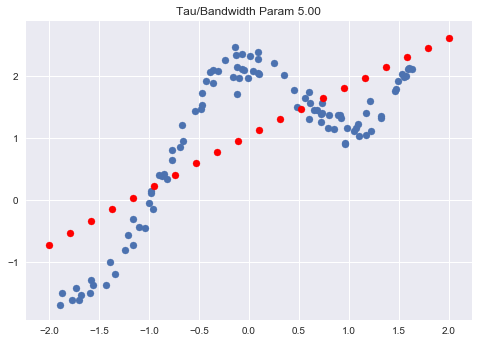

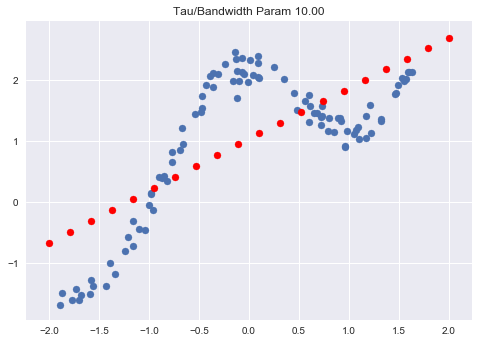

In [46]:
taus = [0.1,0.5,1,5,10]
for t in taus:
    plotPrediction(t)